In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/water-pollution-data/Cities_Water_Pollution (50).csv


In [2]:
df = pd.read_csv('/kaggle/input/water-pollution-data/Cities_Water_Pollution (50).csv')

df.head()

,City,Region,Country,WaterPollution
0,New York City,New York,United States of America,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,49.107143
2,San Francisco,California,United States of America,43.000000
3,Berlin,NaN,Germany,28.612717
4,Los Angeles,California,United States of America,61.299435


In [3]:
df.dtypes

City               object
Region             object
Country            object
WaterPollution    float64
dtype: object

In [4]:
rm_quote = lambda x: x.replace('"', '')
df = df.rename(columns=rm_quote)
df = df.rename(columns=lambda x: x.strip())

In [5]:
df.head()

,City,Region,Country,WaterPollution
0,New York City,New York,United States of America,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,49.107143
2,San Francisco,California,United States of America,43.000000
3,Berlin,NaN,Germany,28.612717
4,Los Angeles,California,United States of America,61.299435


In [6]:
pollution_clean_df = df.drop(columns = ["Region"])

def subtraction_100(x):
    return 100 - x



pollution_clean_df["WaterQuality"] = pollution_clean_df['WaterPollution'].apply(subtraction_100)

pollution_clean_df.head()

,City,Country,WaterPollution,WaterQuality
0,New York City,United States of America,49.504950,50.495050
1,"Washington, D.C.",United States of America,49.107143,50.892857
2,San Francisco,United States of America,43.000000,57.000000
3,Berlin,Germany,28.612717,71.387283
4,Los Angeles,United States of America,61.299435,38.700565


In [7]:
average_water_pollution = pollution_clean_df.groupby("Country", as_index=False).agg({"WaterPollution":"mean"})

top_50_water_pollution = average_water_pollution.sort_values("WaterPollution", ascending = False).head(55)

overall_avg_water_pol = average_water_pollution["WaterPollution"].mean()

Text(0, 0.5, 'Country')

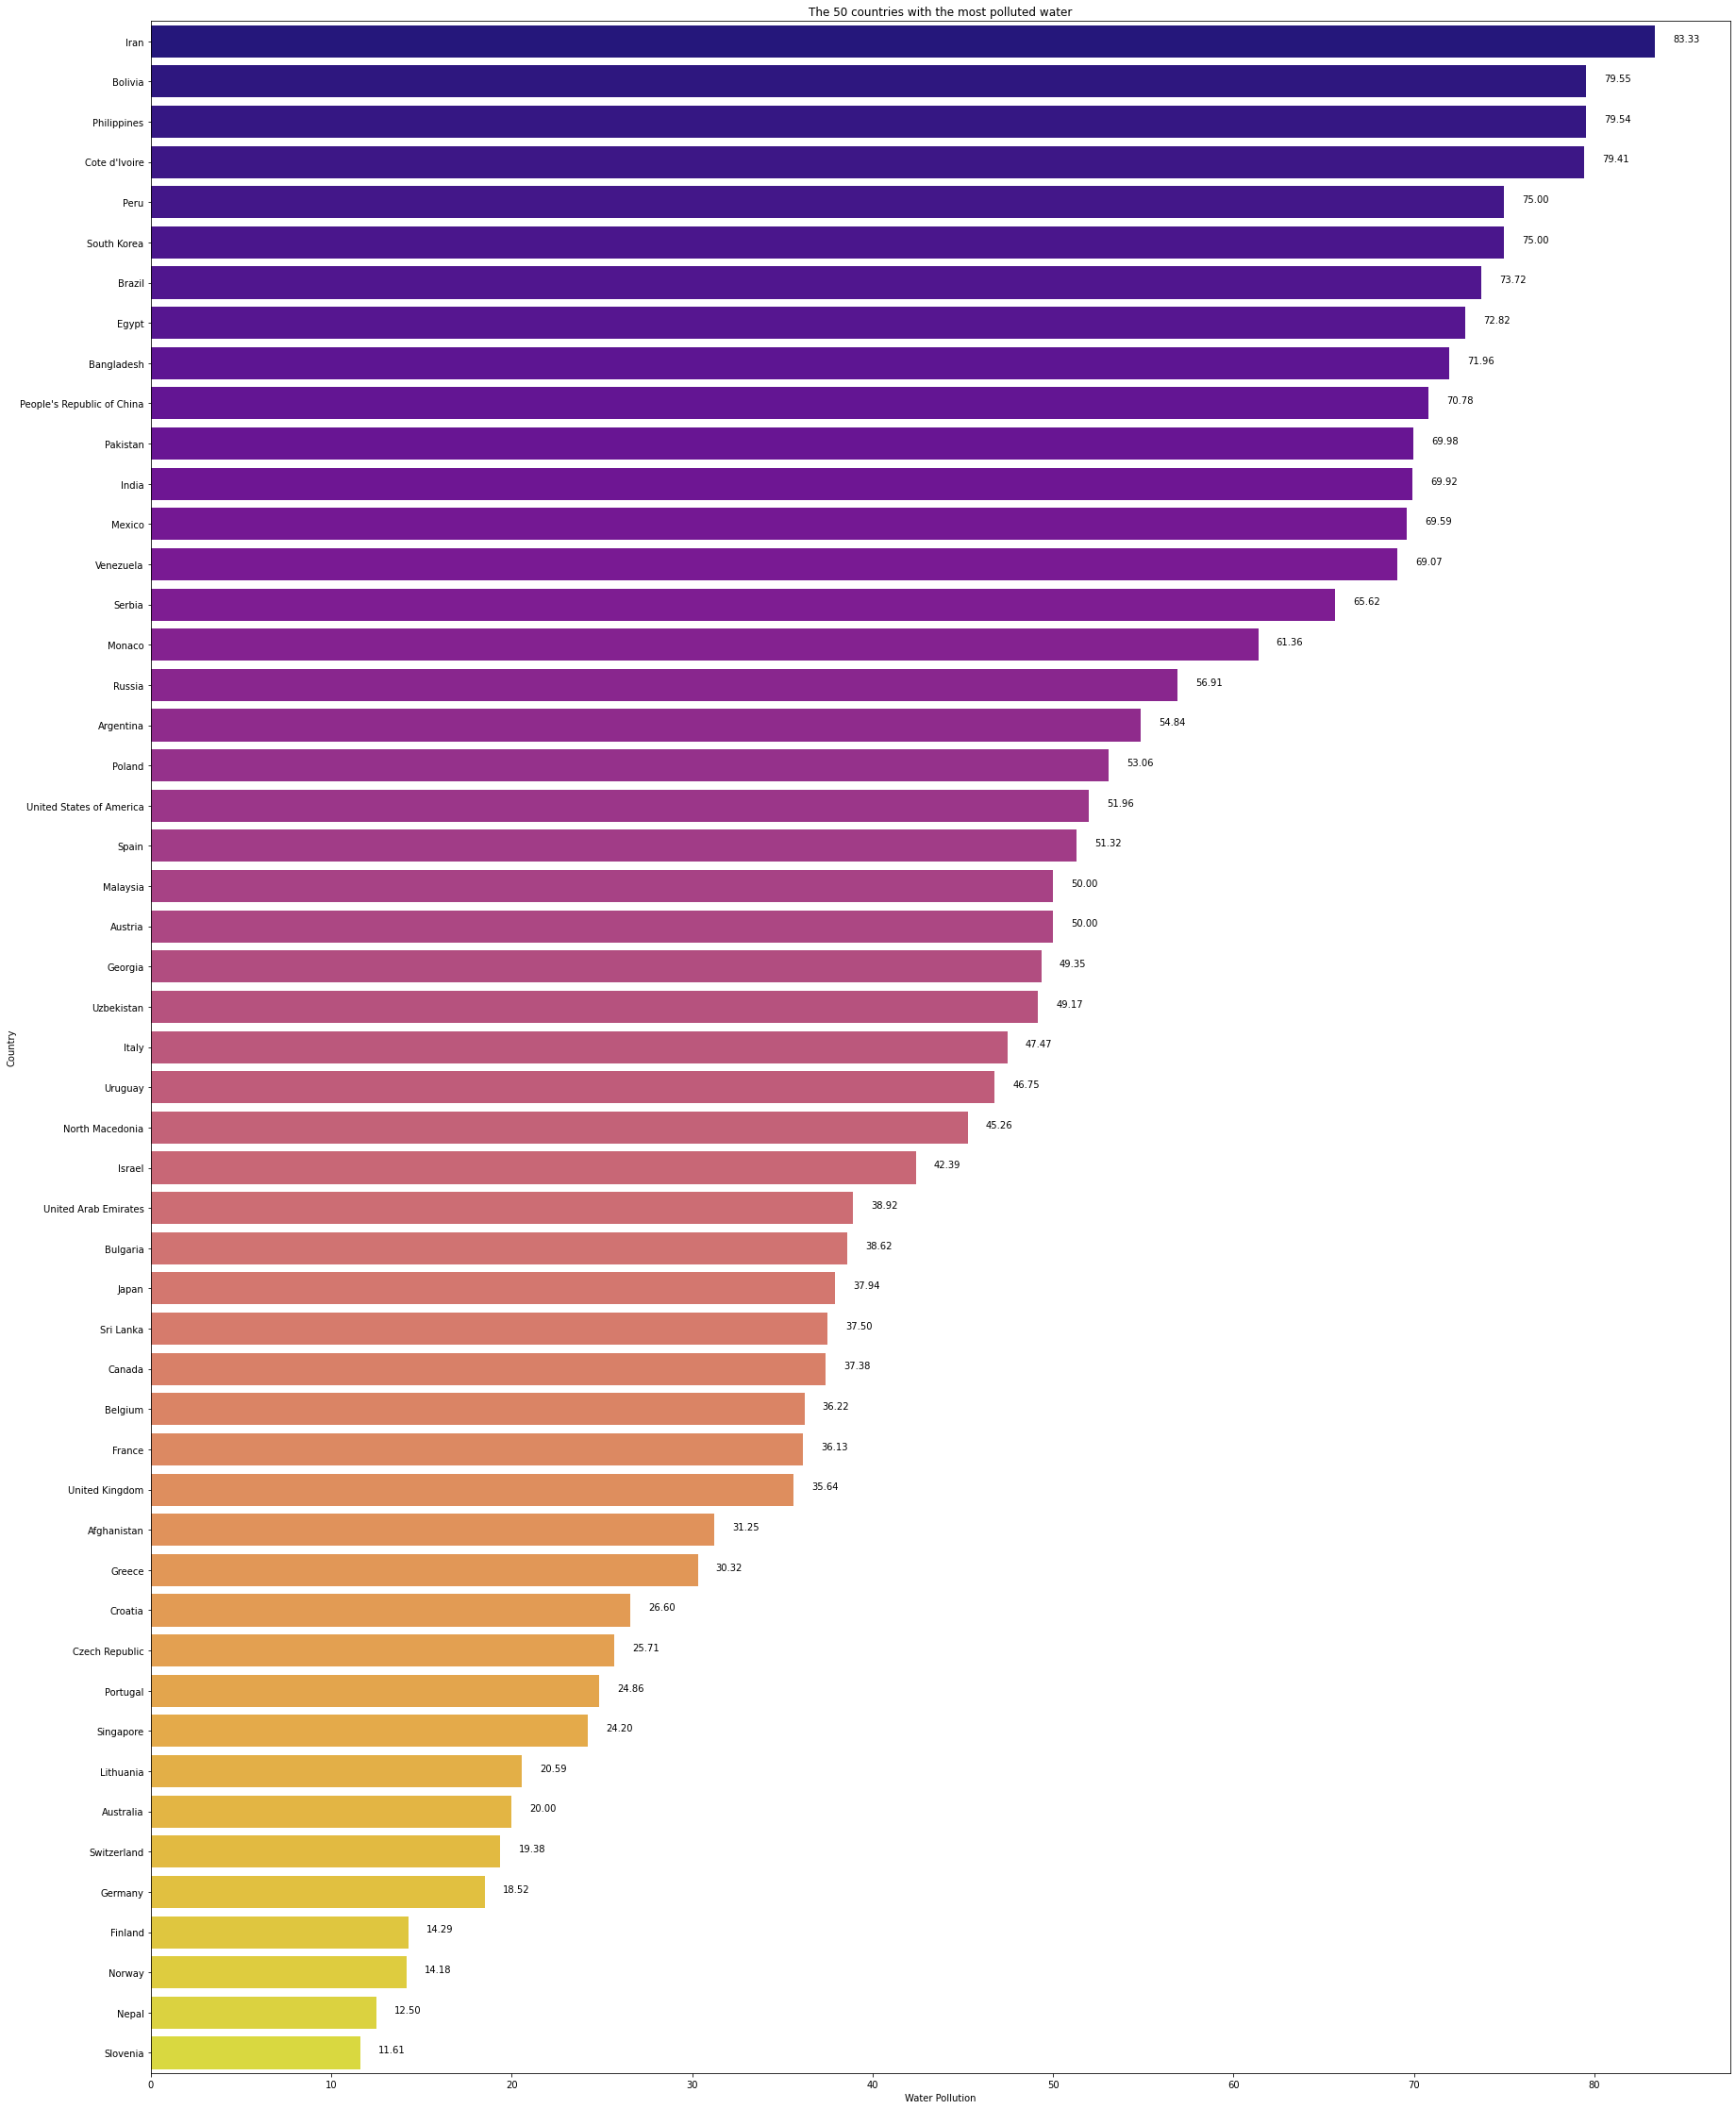

In [8]:
plt.figure(figsize = (30,40))
d = sns.barplot(x='WaterPollution',y='Country',data=top_50_water_pollution, palette="plasma")

for i,v in enumerate(top_50_water_pollution.WaterPollution):
    d.text(v+1, i, str(("%.2f" % v)))

plt.title('The 50 countries with the most polluted water')
plt.xlabel('Water Pollution')
plt.ylabel('Country')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Water Pollution Values Distribution')

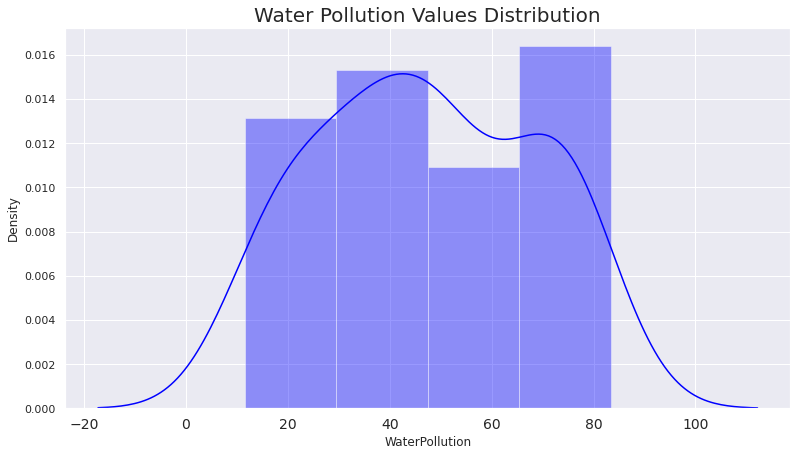

In [9]:
sns.set(rc={'figure.figsize':(13,7)})
plt.xticks(fontsize=14)
p=sns.distplot(top_50_water_pollution.WaterPollution,color='Blue')
p.axes.set_title("Water Pollution Values Distribution",fontsize=20)

In [10]:
average_water_pollution = pollution_clean_df.groupby("City", as_index=False).agg({"WaterPollution":"mean"})

top_140_water_pollution = average_water_pollution.sort_values("WaterPollution", ascending = False).head(140)

overall_avg_water_pol = average_water_pollution["WaterPollution"].mean()

Text(0, 0.5, 'City')

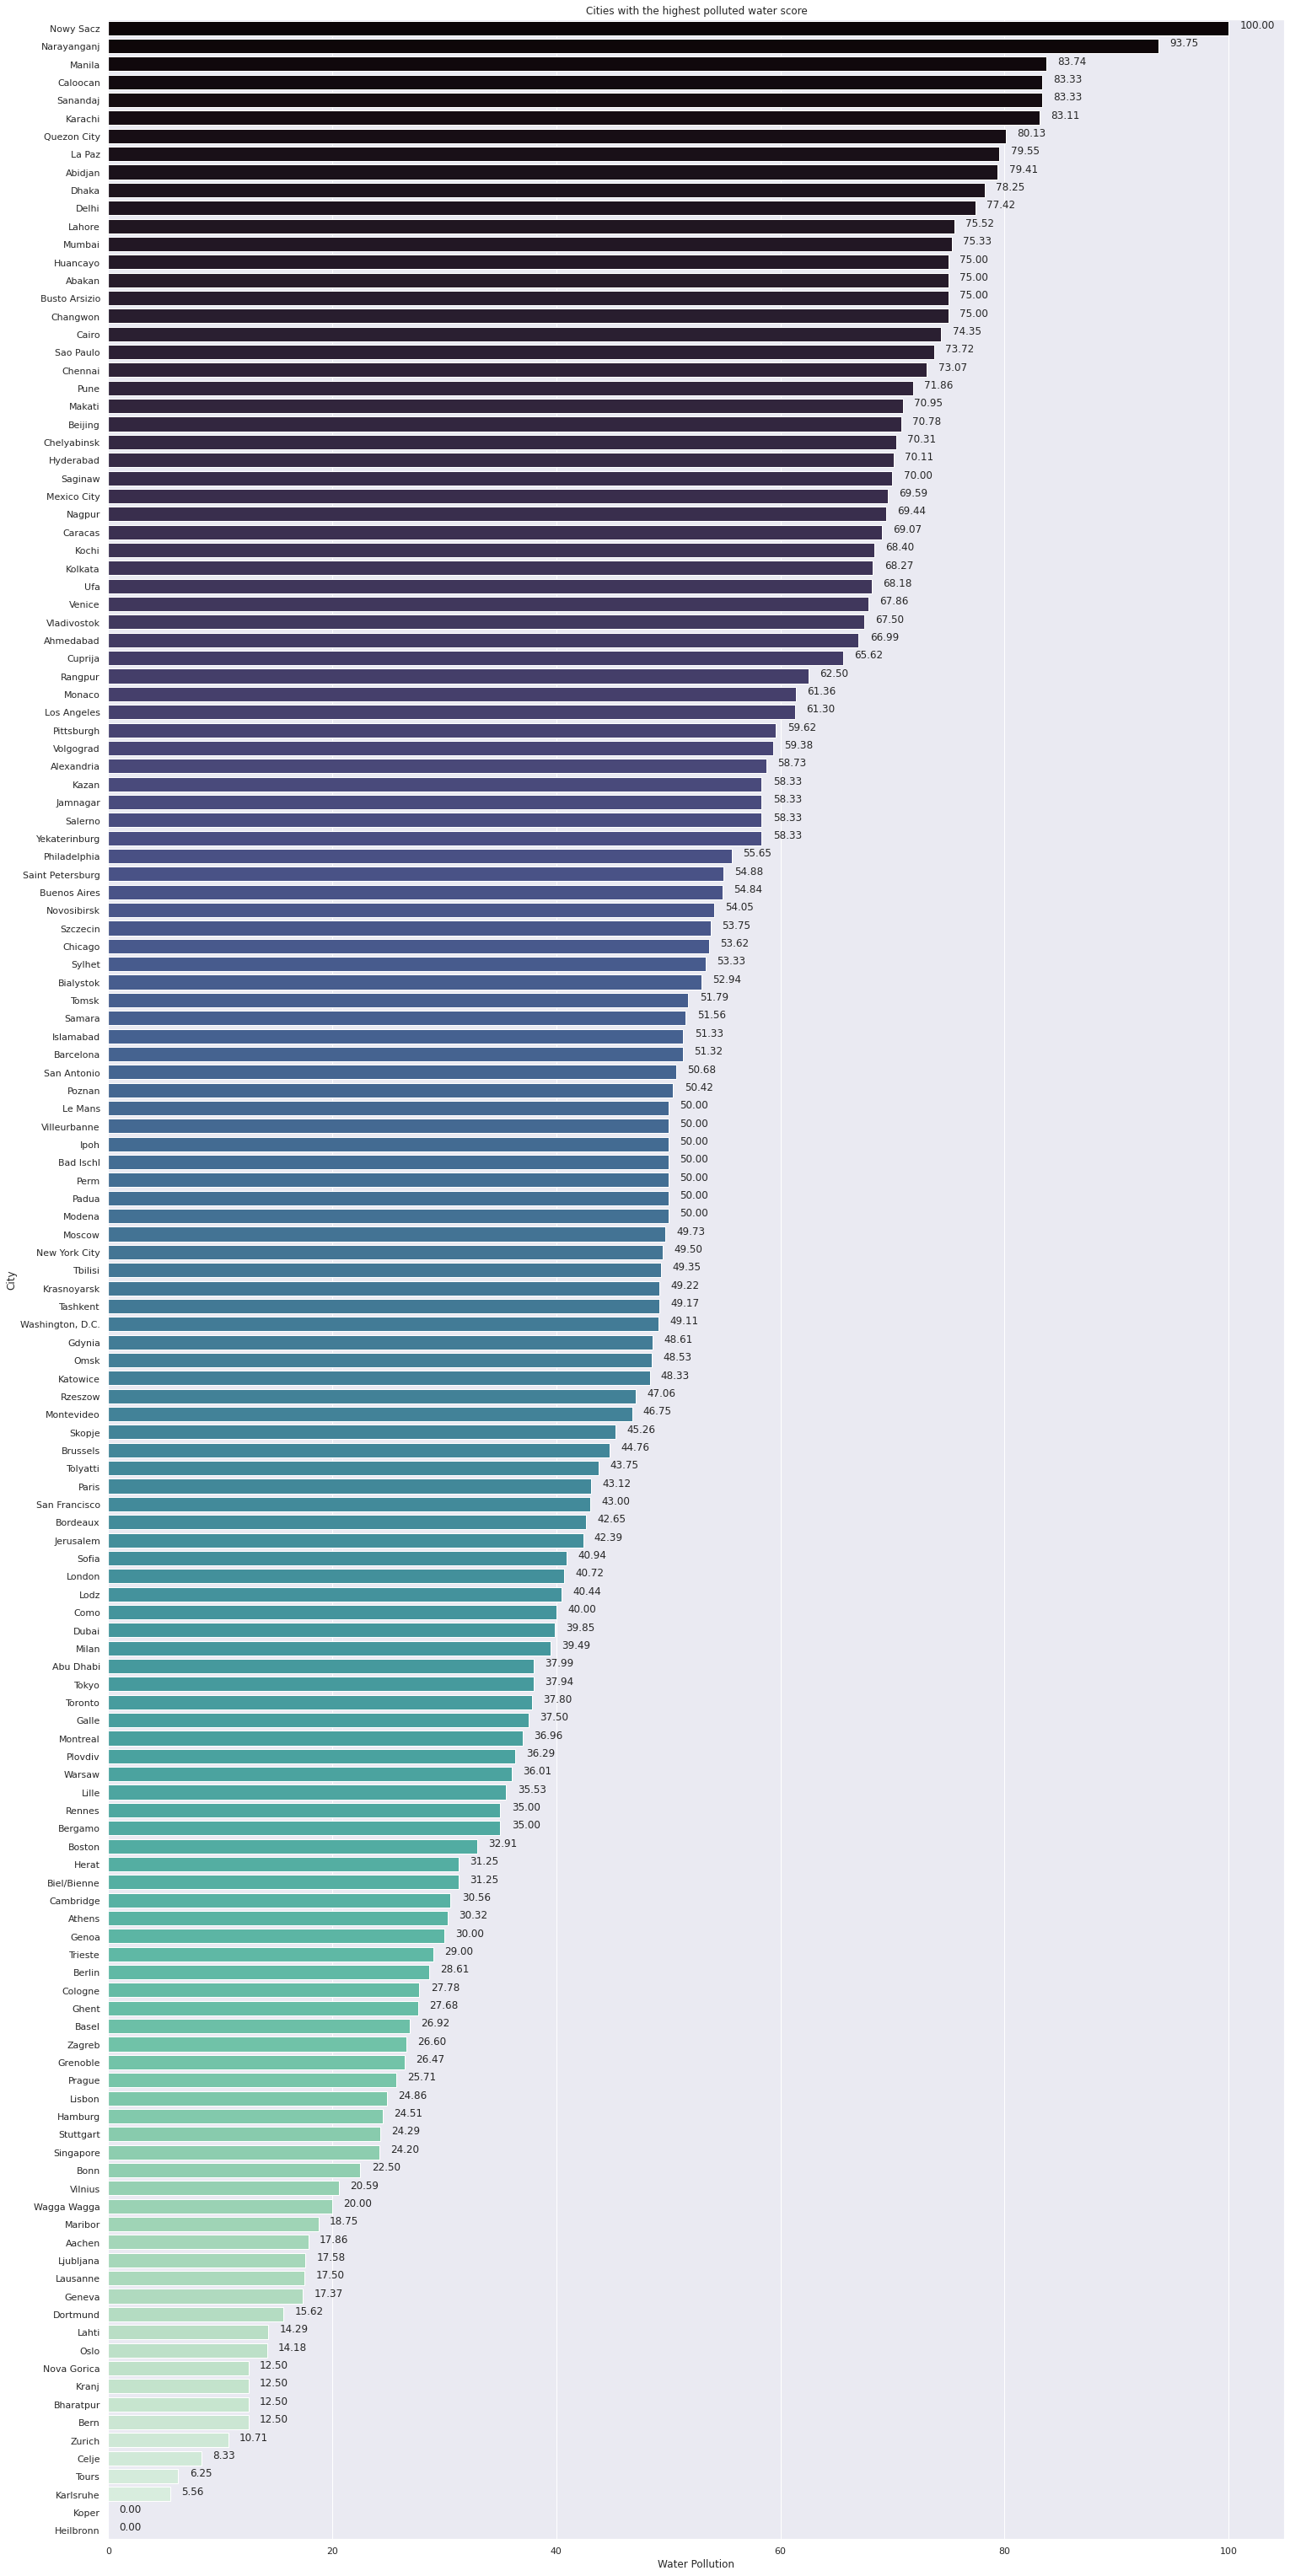

In [11]:
plt.figure(figsize = (25,55))
d = sns.barplot(x='WaterPollution',y='City',data=top_140_water_pollution, palette="mako")

for i,v in enumerate(top_140_water_pollution.WaterPollution):
    d.text(v+1, i, str(("%.2f" % v)))

plt.title('Cities with the highest polluted water score')
plt.xlabel('Water Pollution')
plt.ylabel('City')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Water Pollution in cities Values Distribution')

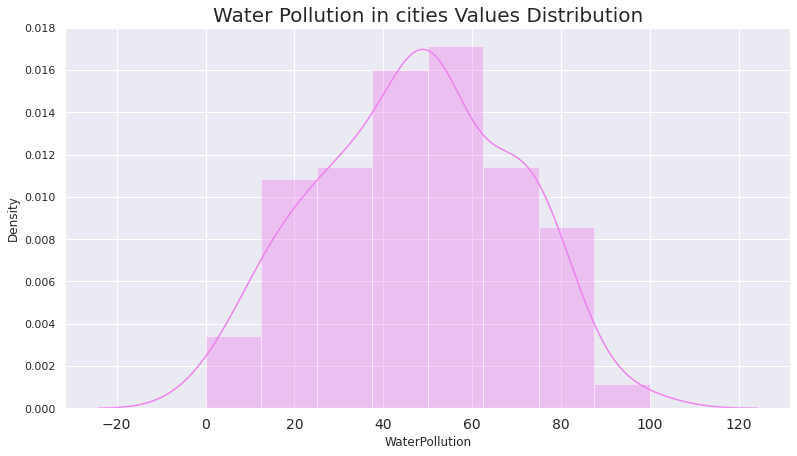

In [13]:
sns.set(rc={'figure.figsize':(13,7)})
plt.xticks(fontsize=14)
p=sns.distplot(top_140_water_pollution.WaterPollution,color='violet')
p.axes.set_title("Water Pollution in cities Values Distribution",fontsize=20)

In [14]:
average_water_quality = pollution_clean_df.groupby("Country",
                                                   as_index=False).agg({"WaterQuality":"mean"})

top_50_water_quality = average_water_quality.sort_values("WaterQuality", 
                                                         ascending = False).head(55)

overall_avg_water_qual = average_water_quality["WaterQuality"].mean()

Text(0, 0.5, 'Country')

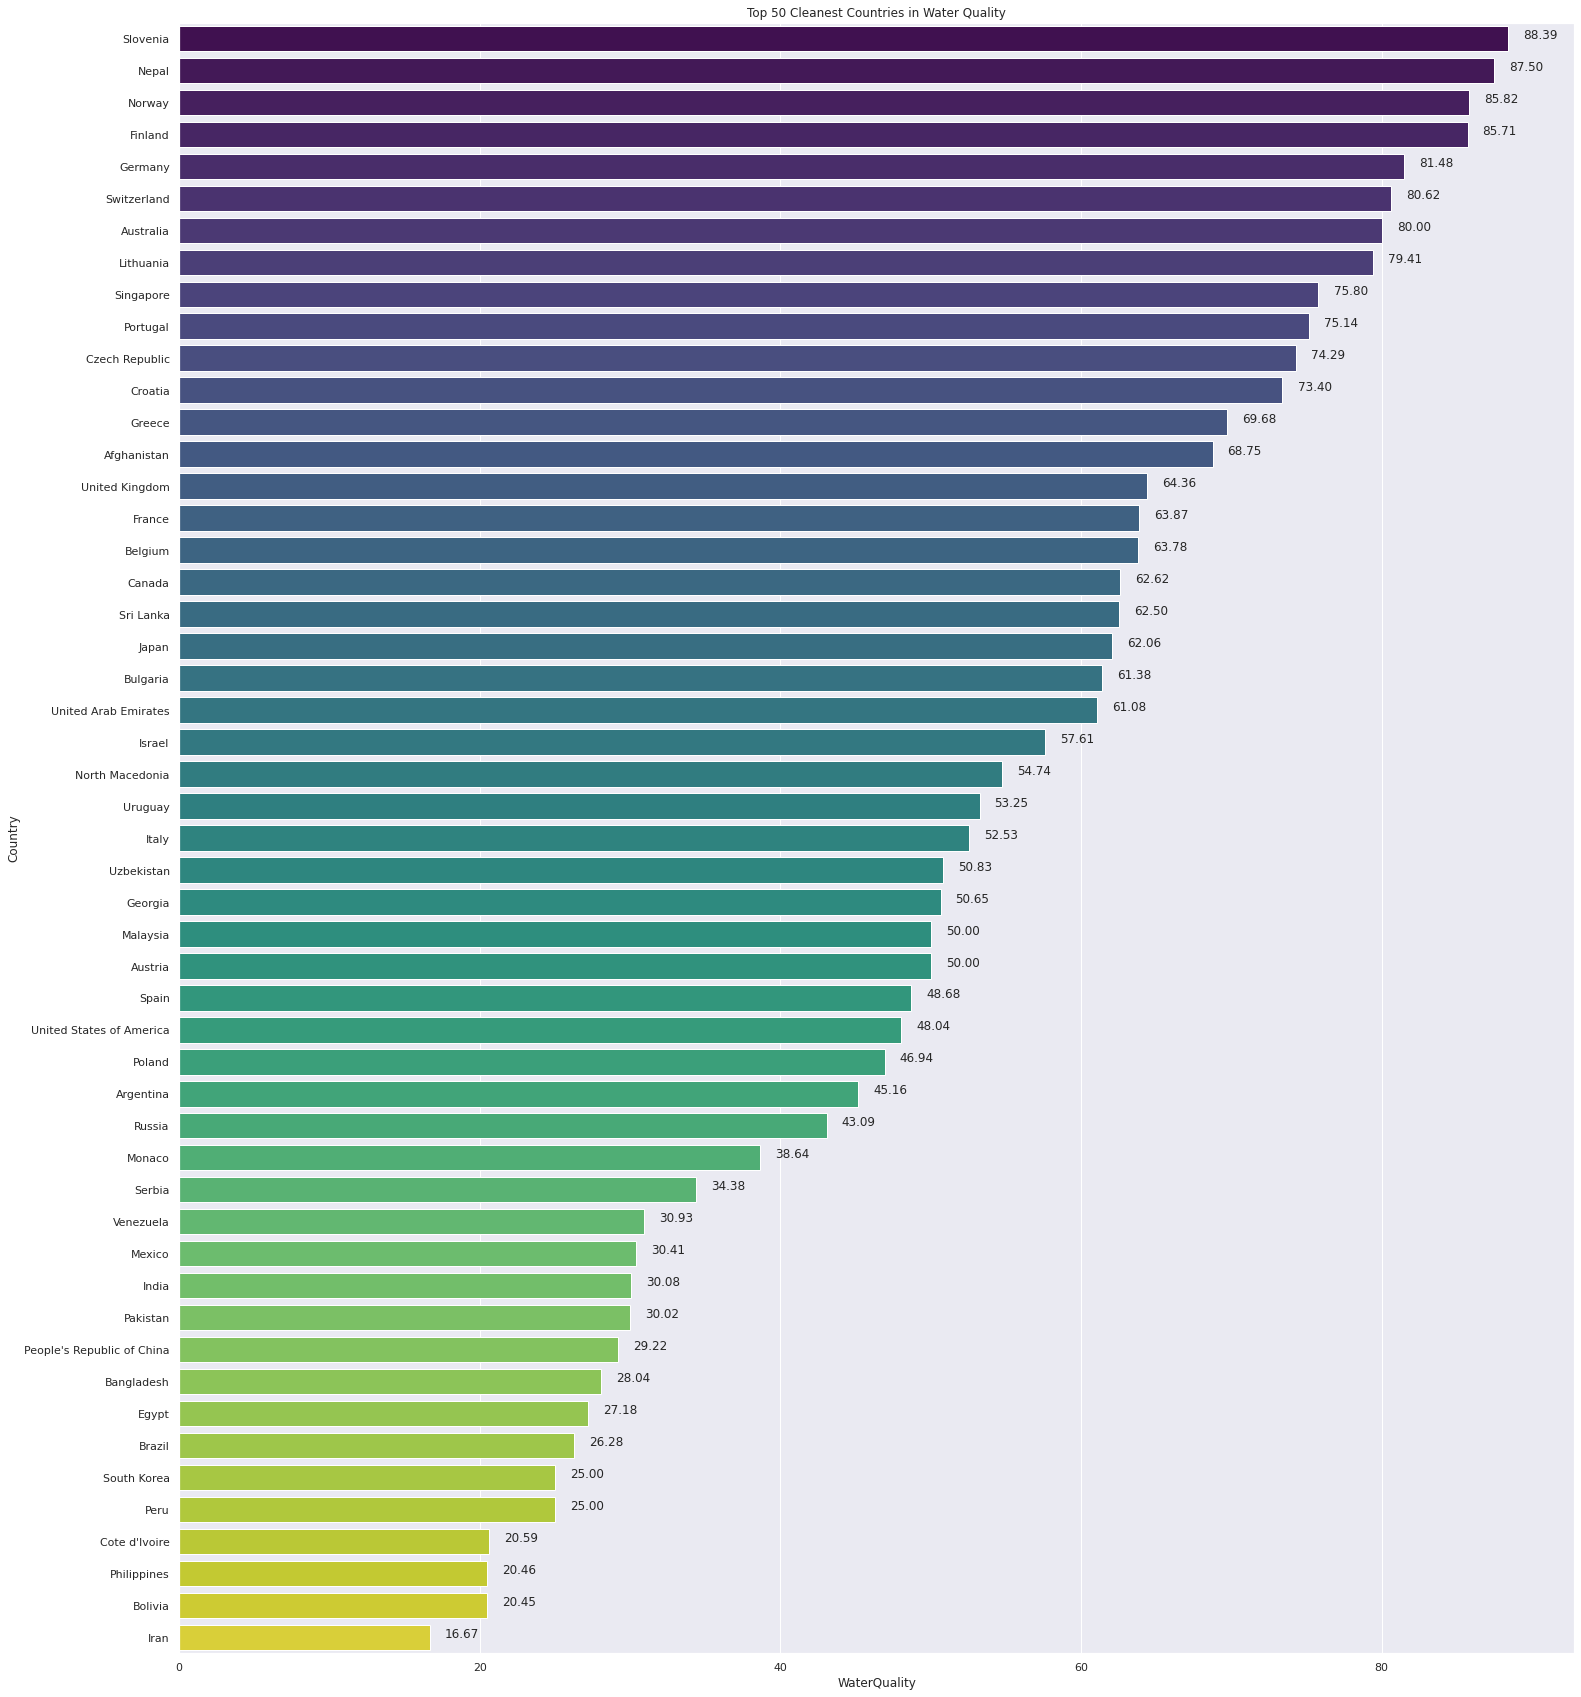

In [15]:
plt.figure(figsize = (25,30))

d = sns.barplot(x='WaterQuality',
            y='Country',
            data=top_50_water_quality,
            palette="viridis")

for i,v in enumerate(top_50_water_quality.WaterQuality):
    d.text(v+1, i, str(("%.2f" % v)))

plt.title('Top 50 Cleanest Countries in Water Quality')
plt.xlabel('WaterQuality')
plt.ylabel('Country')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Water Quality Values Distribution')

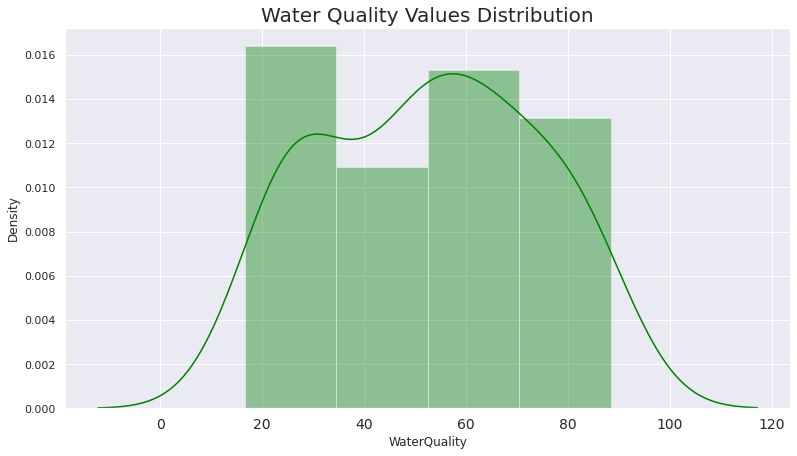

In [16]:
sns.set(rc={'figure.figsize':(13,7)})
plt.xticks(fontsize=14)
p=sns.distplot(top_50_water_quality.WaterQuality,color='Green')
p.axes.set_title("Water Quality Values Distribution",fontsize=20)

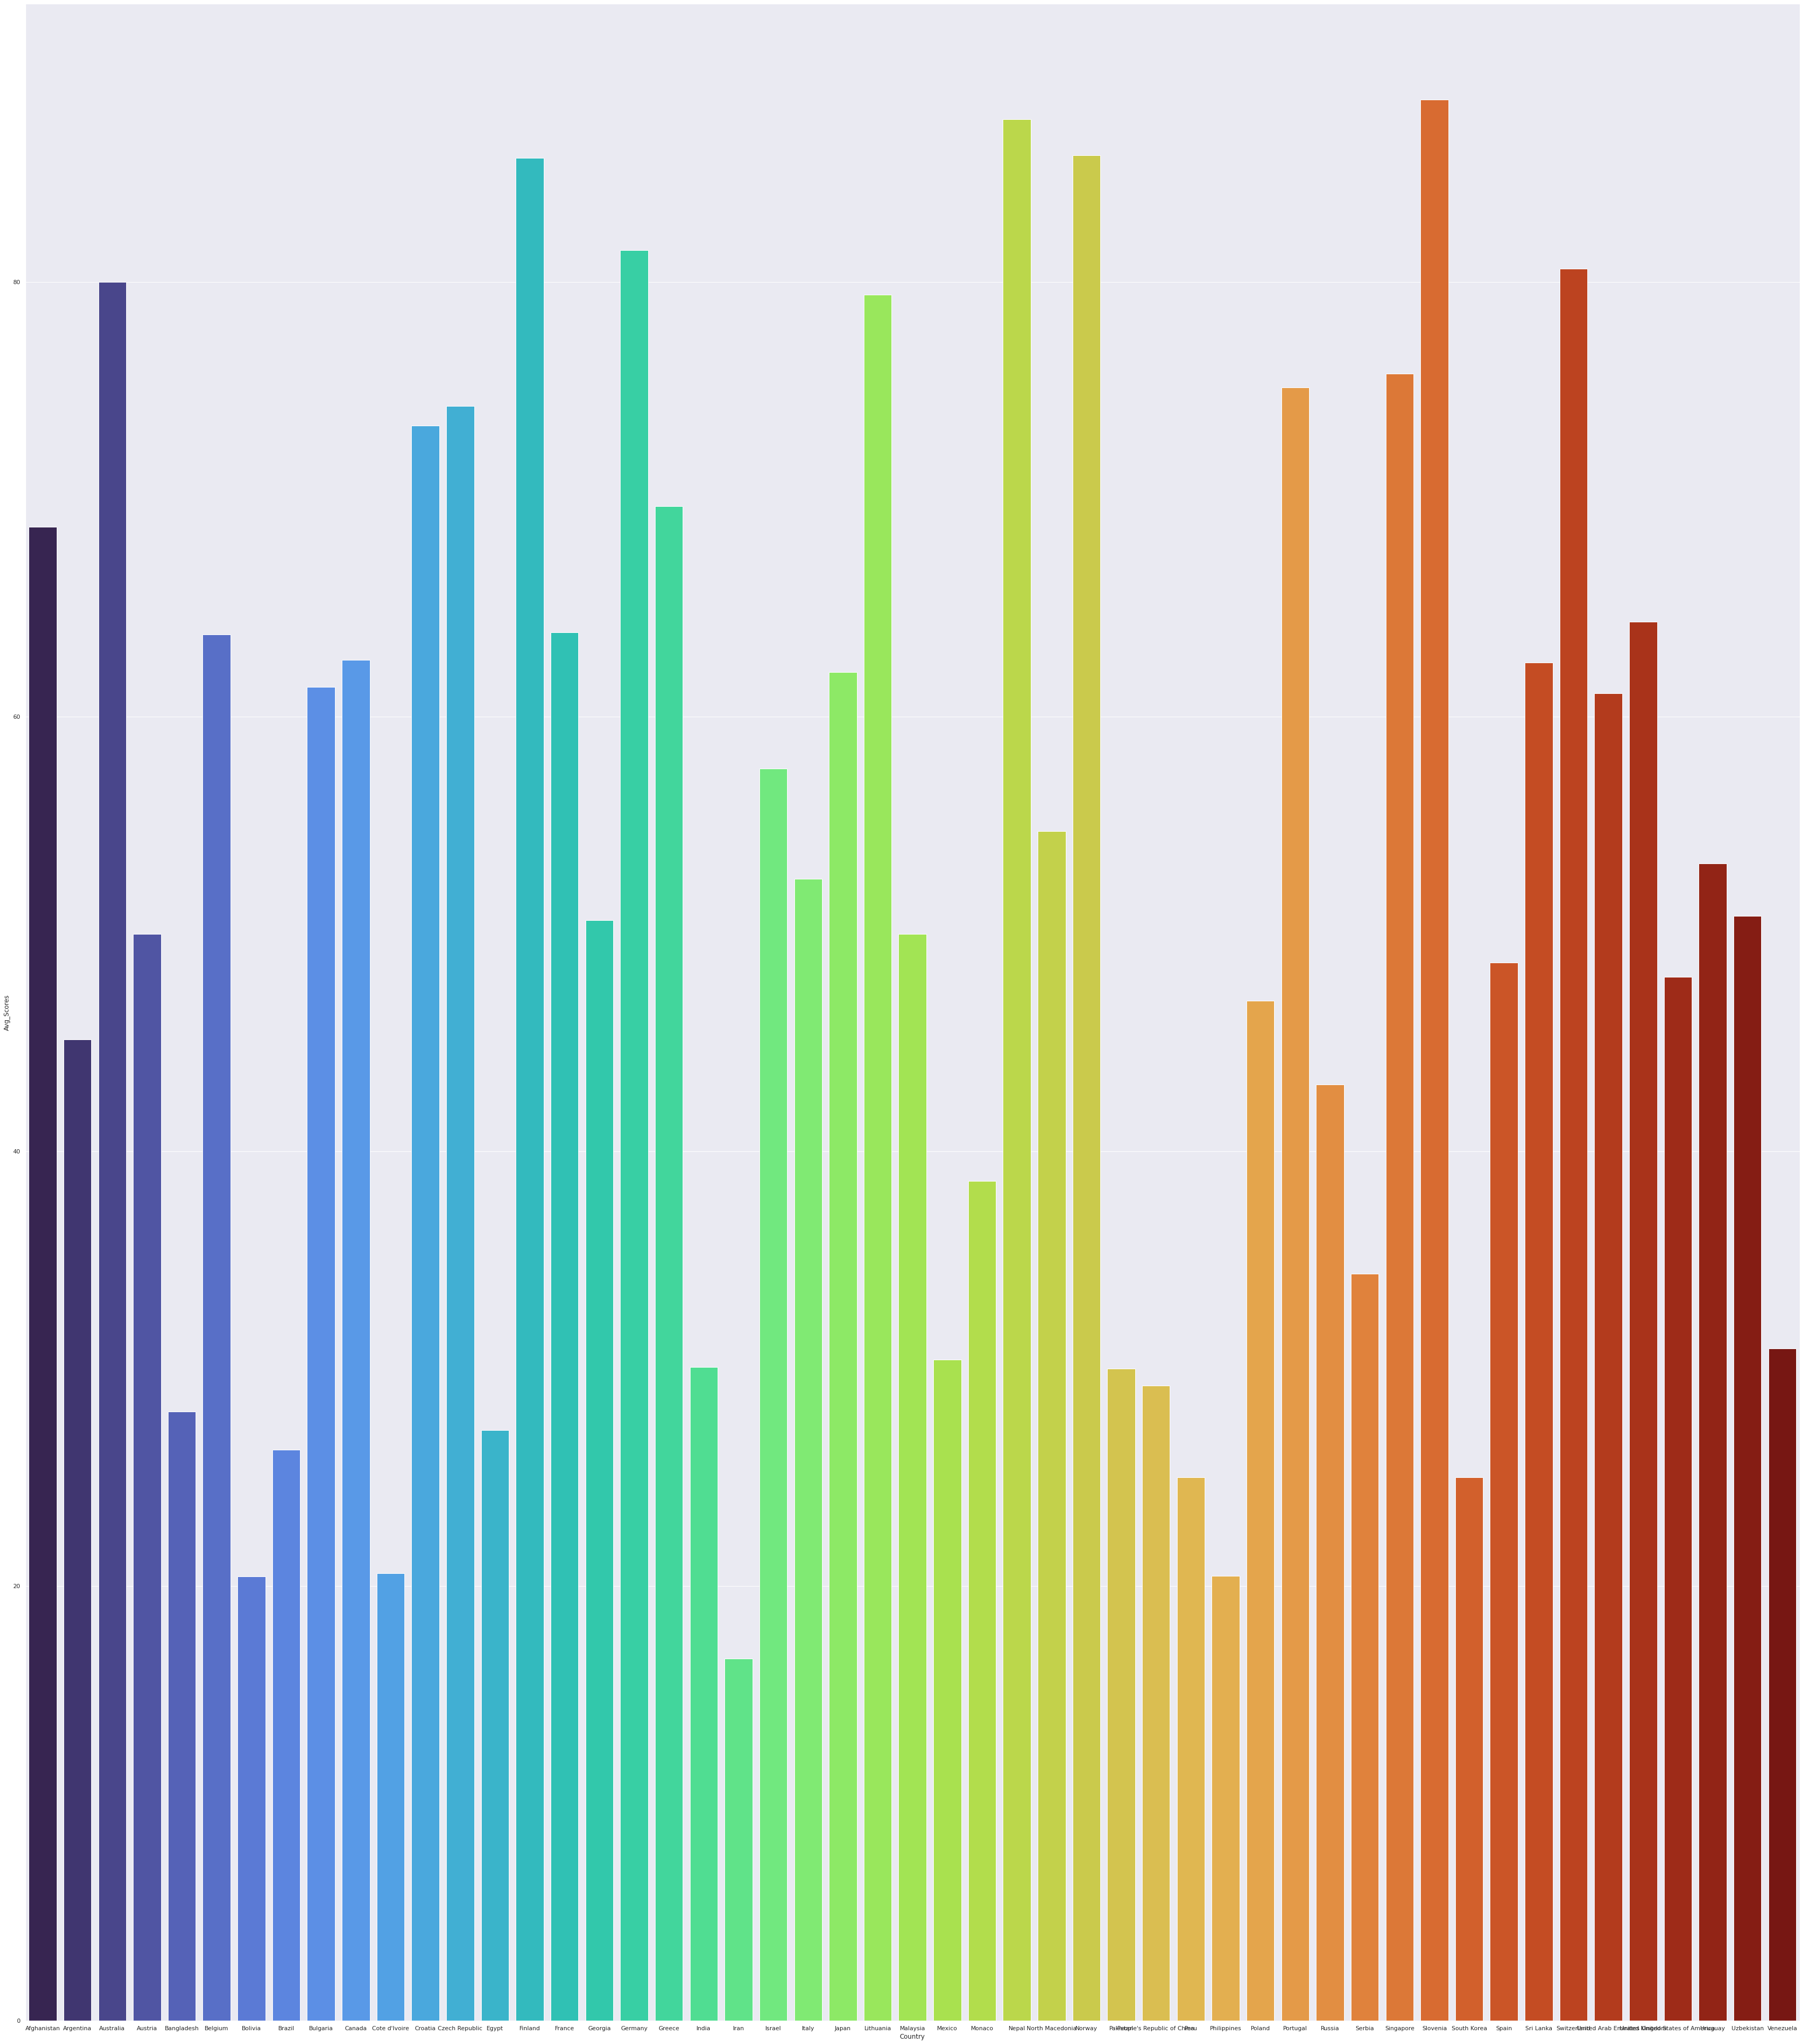

In [17]:
average_quality_scores = pollution_clean_df.groupby("Country", as_index=False).agg({"WaterQuality":"mean"})
average_quality_scores_pivot = pd.melt(average_quality_scores,
                                       id_vars=['Country'],
                                       value_vars=['WaterQuality'],
                                       var_name='Quality_Types',
                                       value_name='Avg_Scores')
plt.figure(figsize = (60,70))

d = sns.barplot(x='Country',
            y='Avg_Scores',
            data=average_quality_scores_pivot,
            palette="turbo")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Water Pollution Quality Avg Distribution')

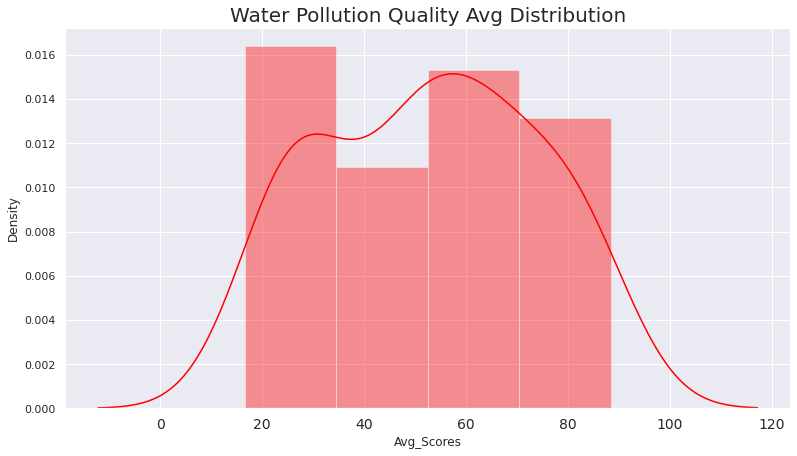

In [18]:
sns.set(rc={'figure.figsize':(13,7)})
plt.xticks(fontsize=14)
p=sns.distplot(average_quality_scores_pivot.Avg_Scores,color='Red')
p.axes.set_title("Water Pollution Quality Avg Distribution",fontsize=20)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


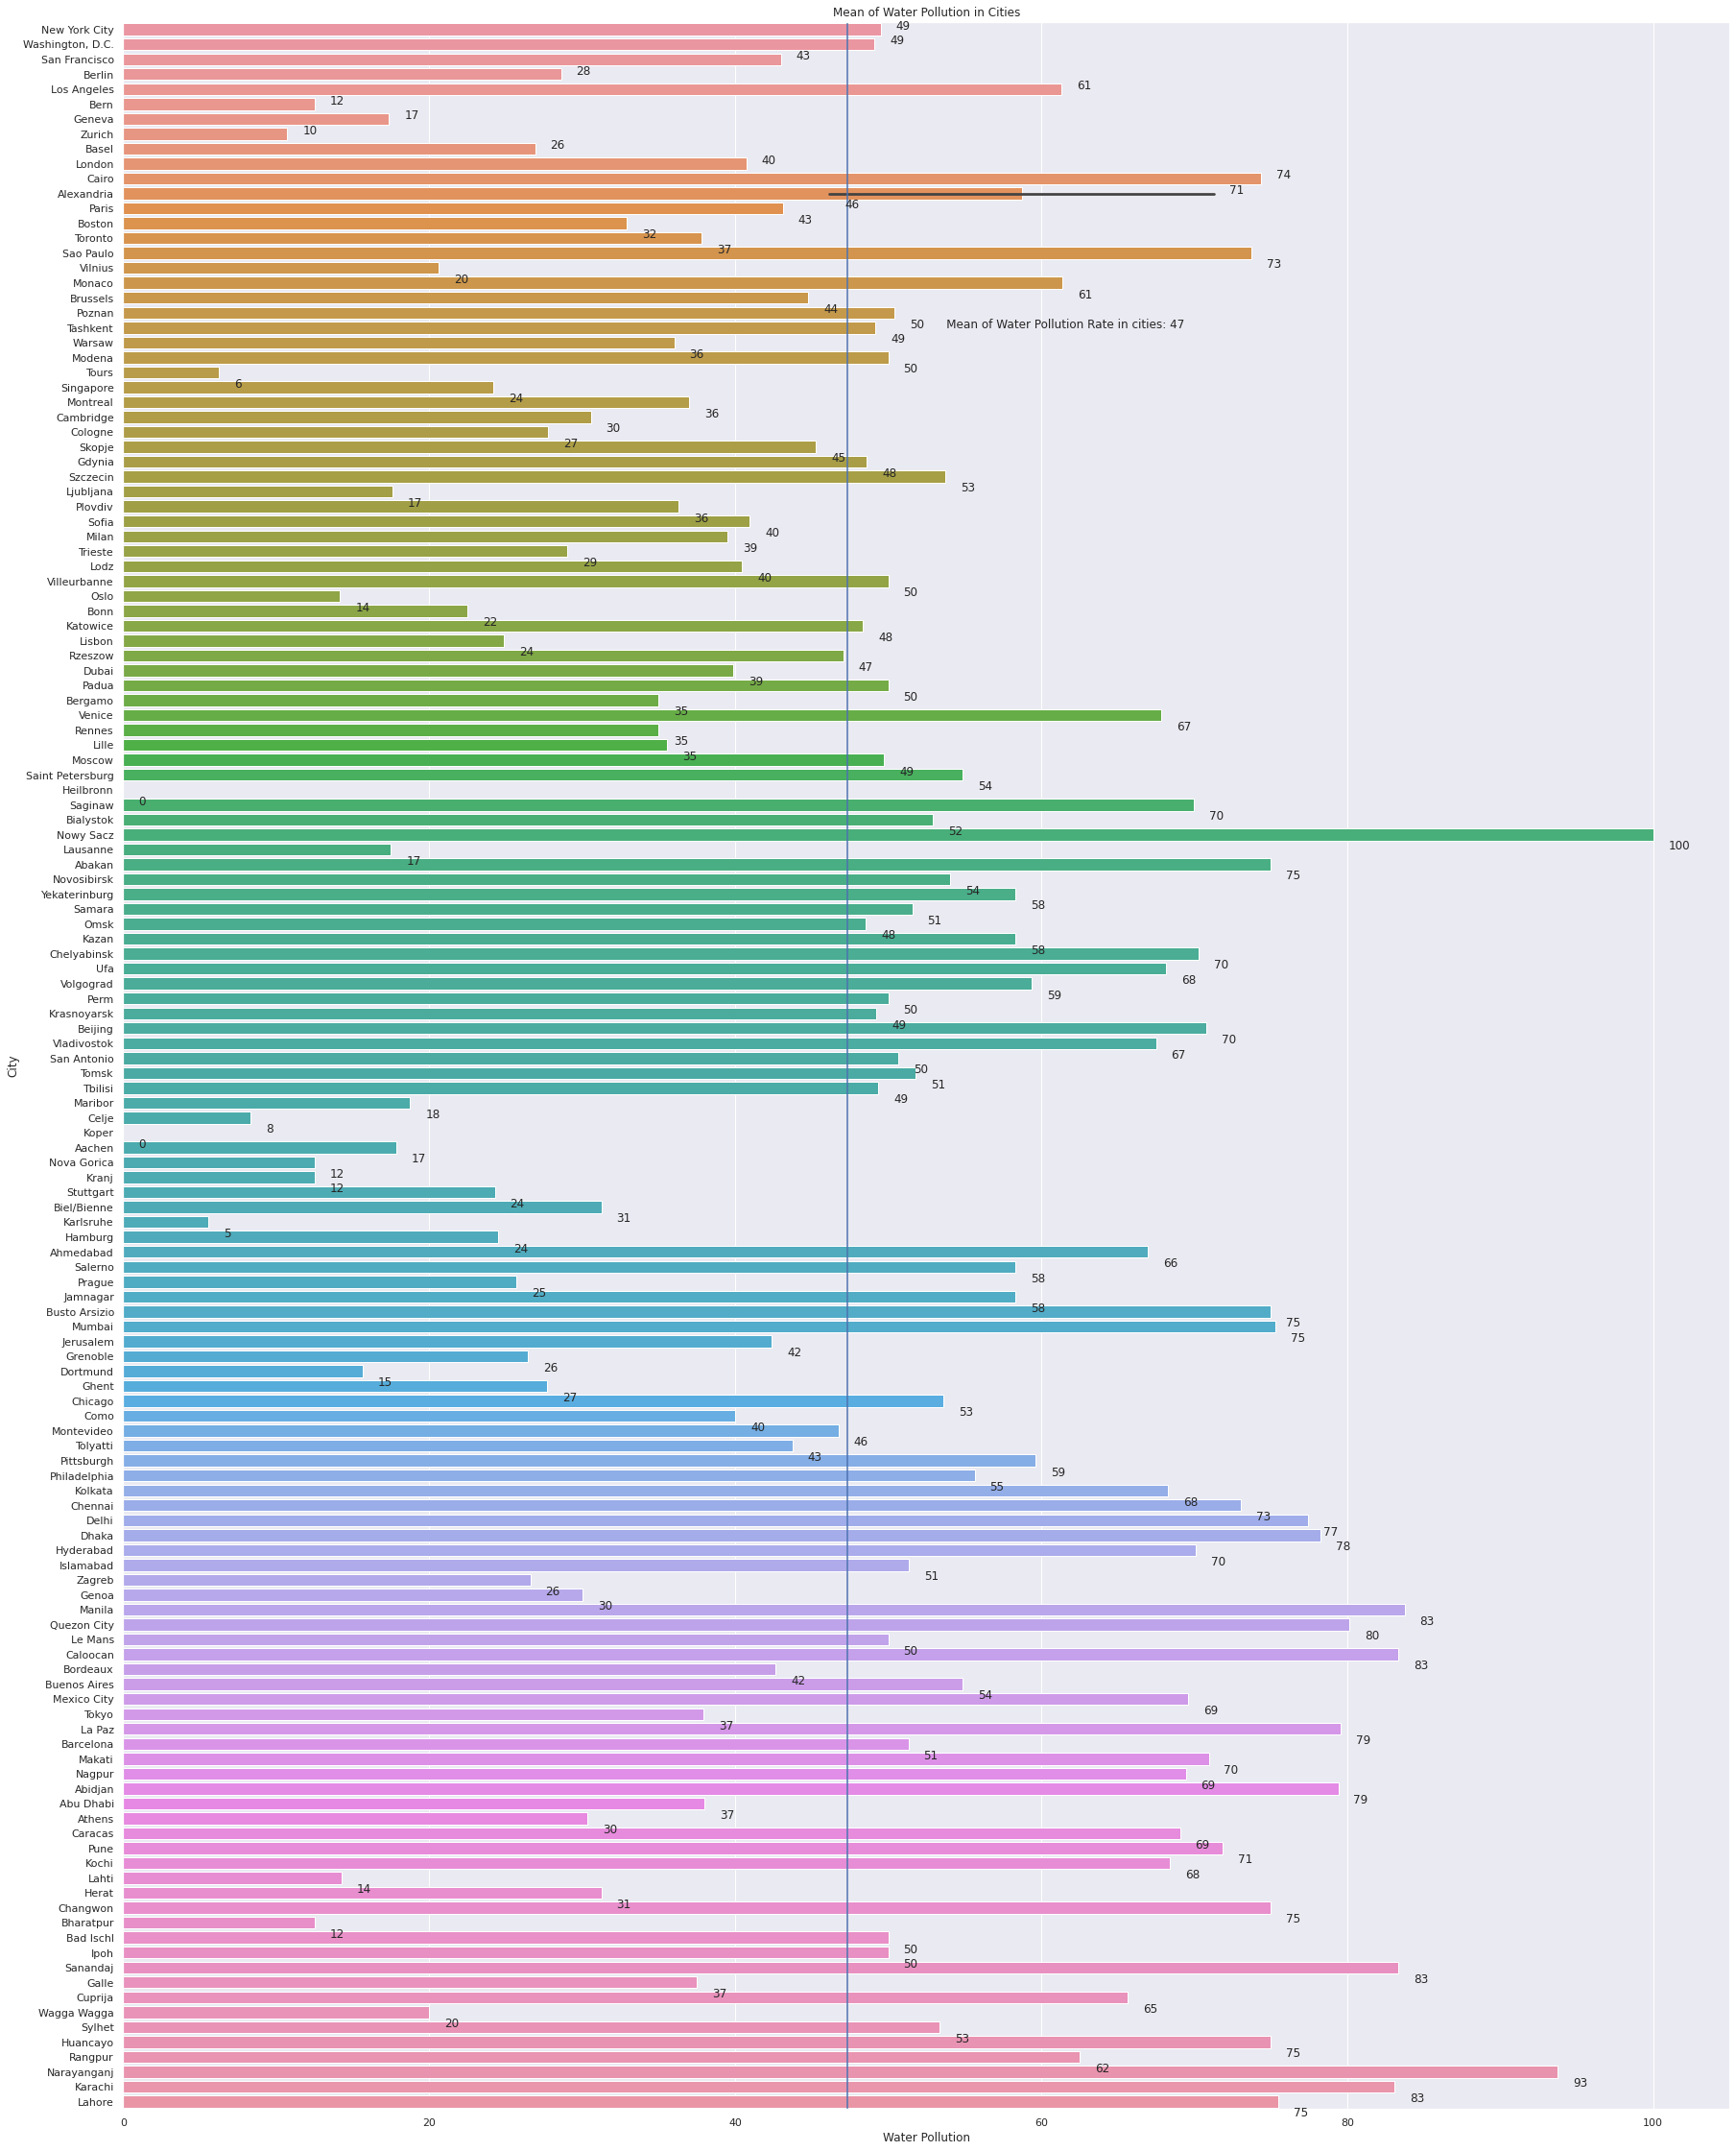

In [19]:
avg_wp = np.mean(df['WaterPollution'])

plt.figure(figsize=(30,40))
g = sns.barplot(df.WaterPollution, df.City)
# Adding labels of data value
for i, v in enumerate(df.WaterPollution):
    g.text(v+1, i, str(int(v)))
plt.title('Mean of Water Pollution in Cities')
plt.xlabel('Water Pollution')
plt.axvline(avg_wp) # The vertical line
g.text(avg_wp + 5, 20, '      Mean of Water Pollution Rate in cities: ' + str(int(avg_wp)))
plt.show()